This code plots the orbit of an eccentric black hole binary using PN corrections
It also computes their orbital decay due to the emission of gravitational waves
The code unit for velocity is 978462.7092846271 mpc/year
The code unit for mass is 4.42637327291843e+35
The speed of light in code units is 306.391296423738 mpc/year
The initial conditions for the binary are: 
Positions:  [0.19 0.   0.  ]
Velocities:  [0.        4.8650183 0.       ]
These values have been written to the file: binary.ecc.ini

The theorized correction is:  0.4747698746644082 radians per orbit


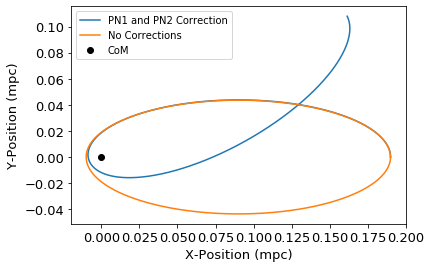

The numerical precession is 0.6100921250464275 radians per orbit
The difference between theoretical and numerical is:  0.13532225038201934


/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:288: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


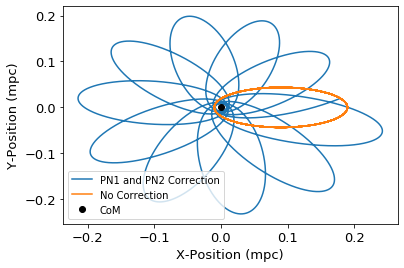

KeyboardInterrupt: 

In [1]:
# This is the code for assignment 2

# This code solves the two body problem for a binary black hole pair using post netwonian corrections
# It models the decay of a black hole binary orbit due to emission of gravitational waves


# import packages
import matplotlib.pyplot as plt
import numpy as np

print('This code plots the orbit of an eccentric black hole binary using PN corrections')
print('It also computes their orbital decay due to the emission of gravitational waves')

# ------------ 1) Leapfrog algorithm with variable timestep and corrections ------------- 

# function for the corrections
def getA(pos,vel,r,mu,c,tot_mass):
    
    rdot = np.dot(pos,vel)/np.linalg.norm(pos)
    v = np.linalg.norm(vel)

    A1 = -1.5*rdot**2*tot_mass + (1+3*tot_mass)*v**2 - 2*(2+tot_mass)*mu/r
    A2 = 1.875*rdot**4*tot_mass*(1-3*tot_mass) + 3*rdot**2*tot_mass*v**2*(2*tot_mass-1.5) + tot_mass*v**4*(3-4*tot_mass)+ mu/r * (-2*rdot**2*(1+tot_mass**2) - 25*rdot*tot_mass - 6.5*tot_mass*v**2) + mu**2/r**2*(9 + 21.75*tot_mass)
    A25 = -1.6*mu/r * tot_mass * rdot * (17/3 * mu/r + 3*v**2)
    B1 = -2*(2-tot_mass)*rdot
    B2 = 3*rdot**3*tot_mass*(1.5+tot_mass) - rdot*tot_mass*v**2*(7.5 + 2*tot_mass) + mu*rdot/r *(2+20.5*tot_mass+4*tot_mass**2)
    B25 = 1.6*mu/r * tot_mass * (3*mu/r + v**2)


    return A1,A2,A25,B1,B2,B25
    
# function for the leapfrog algorithm
def leapfrog(x,y,z,Vx,Vy,Vz,period,mu,c,PN1=True,PN2=True,PN25=True):
    
    # initialise the empty lists to be appended into
    x_vals = []
    y_vals = []
    z_vals = []
    Vx_vals = []
    Vy_vals = []
    Vz_vals = []
    time = []
    phi = []
    t = 0
    semimajor = []
    eccen = []

    #reset initial conditions
    x = apoc
    y = 0
    z = 0
    Vx = 0
    Vy = Va
    Vz = 0

    pos = np.array([x,y,z])
    vel = np.array([Vx,Vy,Vz])
    r = np.sqrt(x**2 + y**2 + z**2)
    tot_mass = m1*m2/Mtot**2
    h = np.cross(pos,vel)
    const = np.cross(vel,h)
    e = const/mu - pos/r
    abs_e = np.sqrt(e[0]**2 + e[1]**2 + e[2]**2)
    ang = np.arctan(e[1]/e[0])

    # set intial acceleration
    A1,A2,A25,B1,B2,B25 = getA(pos,vel,r,mu,c,tot_mass)
    
    if PN1 == False:
        A1 = 0
        B1 = 0
    if PN2 == False:
        A2 = 0
        B2 = 0
    if PN25 == False:
        A25 = 0
        B25 = 0
    
    A = 1 + A1/c**2 + A2/c**4 + A25/c**5
    B = B1/c**2 + B2/c**4 + B25/c**5
    
    a_x = -mu/r**2 * (A*x/r + B*Vx)
    a_y = -mu/r**2 * (A*y/r + B*Vy)
    a_z = -mu/r**2 * (A*z/r + B*Vz)

    # compute eccentricity and semi major
    v = np.sqrt(Vx**2 + Vy**2)
    a_i = (2/r - v**2/mu)**(-1)
    ecc = np.sqrt(1 - np.linalg.norm(h)**2/(mu*a_i))
    
    with open("binary.circ.orb", 'wb') as f:
        np.savetxt(f, np.array([[t,a_i,ecc,a_p]]), fmt="%s")

    while t < period:

        # appending the current positions, time and velocities to the lists
        x_vals.append(x)
        y_vals.append(y)
        z_vals.append(z)
        Vx_vals.append(Vx)
        Vy_vals.append(Vy)
        Vz_vals.append(Vz)
        phi.append(ang)
        time.append(t)
        semimajor.append(a_i)
        eccen.append(ecc)

        # computing the variable timestep
        dt = acc_para*np.sqrt(r**3/mu)

        # update partial velocity
        Vx_temp = Vx + a_x * dt/2
        Vy_temp = Vy + a_y * dt/2
        Vz_temp = Vz + a_z * dt/2

        # update positions
        x = x + dt * Vx_temp
        y = y + dt * Vy_temp
        z = z + dt * Vz_temp
        pos = np.array([x,y,z])

        # update accerleration
        r = np.sqrt(x**2 + y**2 + z**2)     
        A1,A2,A25,B1,B2,B25 = getA(pos,vel,r,mu,c,tot_mass)

        if PN1 == False:
            A1 = 0
            B1 = 0
        if PN2 == False:
            A2 = 0
            B2 = 0
        if PN25 == False:
            A25 = 0
            B25 = 0

        A = 1 + A1/c**2 + A2/c**4 + A25/c**5
        B = B1/c**2 + B2/c**4 + B25/c**5
 
        a_x = -mu/r**2 * (A*x/r + B*Vx)
        a_y = -mu/r**2 * (A*y/r + B*Vy)
        a_z = -mu/r**2 * (A*z/r + B*Vz)
        
        # update velocity   
        Vx = Vx_temp + a_x * dt/2
        Vy = Vy_temp + a_y * dt/2
        Vz = Vz_temp + a_z * dt/2
        vel = np.array([Vx,Vy,Vz])

        # computing semi-major axis and eccentricity
        h = np.cross(pos,vel)
        const = np.cross(vel,h)
        e = const/mu - pos/r
        abs_e = np.sqrt(e[0]**2 + e[1]**2 + e[2]**2)
        ang = np.arctan(e[1]/e[0])
        v = np.sqrt(Vx**2 + Vy**2)
        a_i = (2/r - v**2/mu)**(-1)
        ecc = np.sqrt(1 - np.linalg.norm(h)**2/(mu*a_i))

        #update time
        t = t + dt
        
        with open("binary.circ.orb", 'a+') as f:
            np.savetxt(f, np.array([[t,a_i,ecc,a_p]]), fmt="%s")
        
    return x_vals,y_vals,z_vals,Vx_vals,Vy_vals,Vz_vals,phi,time,semimajor,eccen
    

# -------------- 2) Parameters used throughout the code --------------

#SI
G_si = 6.67408e-11 
sol_mass = 1.98855e+30 # kg
R_si = 3.08568e+13 #mpc
T_si = 31536000 #seconds

# Code Units
velocity_unit = R_si/T_si
mass_unit = (R_si)**3/(G_si * (T_si)**2)
G = 1
R = 1
c = 299792458/velocity_unit

print('The code unit for velocity is', velocity_unit, 'mpc/year')
print('The code unit for mass is', mass_unit)
print('The speed of light in code units is', c, 'mpc/year')


# ------------ 3) Binary's initial conditons (Positions and Velocities) --------


# Black Hole Values
a = 0.1 #mpc
e = 0.9 
m1 = 10**7*sol_mass/mass_unit
m2 = 10**4*sol_mass/mass_unit
Mtot = m1 + m2
mu = G*Mtot
tot_mass = m1*m2/Mtot**2
period = np.sqrt((4*np.pi**2*a**3)/(G*m1))

# Computation of the apocentre and pericentre for the binary
apoc = a*(1+e)
peri = a*(1-e)

# Computation of velocity at pericentre and apocentre for the binary
Vp = np.sqrt( (mu/a) * ((1+e)/(1-e)) )
Va = np.sqrt( (mu/a) * ((1-e)/(1+e)) )

# Computation of the inital conditions in cartesian coordinates for the binary
pos = np.array([apoc, 0, 0])
vel = np.array([0, Va, 0])

# writing the inital values to a file
f = open("binary.ecc.ini", "w")
np.savetxt("binary.ecc.ini", np.array([[apoc,0,0], [0,Va,0]]), fmt="%s")
f.close()

print('The initial conditions for the binary are: ')
print('Positions: ',pos)
print('Velocities: ',vel)
print('These values have been written to the file: binary.ecc.ini')
print('')


# ----- 4) Theoretical advance of the pericentre ------


GR_cor = (6*G*np.pi*m1) / (c**2*a*(1-e**2)) #theoretical advance formula
print('The theorized correction is: ', GR_cor, 'radians per orbit')


# ------- 5) integrating the orbit -------


#set accuracy parameter
acc_para = 0.001

# orbit with PN1 and PN2 corrections
x_vals,y_vals,z_vals,Vx_vals,Vy_vals,Vz_vals,phi,time,semimajor,eccen = leapfrog(apoc,0,0,0,Va,0,period,mu,c,PN1=True,PN2=True,PN25=False)
# measuring the numerical precession
num_prec = abs(phi[-1]-phi[0])

# orbit with no corrections
x_valsno,y_valsno,z_vals,Vx_vals,Vy_vals,Vz_vals,phi,time,semimajor,eccen = leapfrog(apoc,0,0,0,Va,0,period,mu,c,PN1=False,PN2=False,PN25=False)


#plottting the orbits
plt.figure(0)
plt.plot(x_vals,y_vals,label='PN1 and PN2 Correction')
plt.plot(x_valsno,y_valsno, label='No Corrections')
plt.plot(0,0,'ko',label='CoM')
plt.xlabel('X-Position (mpc)',fontsize=13)
plt.ylabel('Y-Position (mpc)',fontsize=13)
plt.legend()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('orbits.png', bbox_inches = "tight")
plt.show()

# ------- 6) Theoretical vs Numerical value ---------

print('The numerical precession is', num_prec, 'radians per orbit')
print('The difference between theoretical and numerical is: ', abs(num_prec - GR_cor))

# -------- 7) 360 degree precession -----------

# time in years for a 360 degree precession
tp = (2*np.pi / GR_cor) * period

# integrating the orbit for tp with PN1 AND PN2
x_vals,y_vals,z_vals,Vx_vals,Vy_vals,Vz_vals,phi,time,semimajor,eccen = leapfrog(apoc,0,0,0,Va,0,tp,mu,c,PN1=True,PN2=True,PN25=False)

# no corrections
x_valsno,y_valsno,z_vals,Vx_vals,Vy_vals,Vz_vals,phi,time,semimajor,eccen = leapfrog(apoc,0,0,0,Va,0,tp,mu,c,PN1=False,PN2=False,PN25=False)

#plottting the orbits
plt.figure(1)
plt.plot(x_vals,y_vals,label='PN1 and PN2 Correction')
plt.plot(x_valsno,y_valsno,label='No Correction')
plt.plot(0,0,'ko',label='CoM')
plt.xlabel('X-Position (mpc)',fontsize=13)
plt.ylabel('Y-Position (mpc)',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.savefig('360.png', bbox_inches = "tight")
plt.show()

# ------- 8) 500 year integration ----------

# 500 year integration with PN2.5 correction only
x_vals,y_vals,z_vals,Vx_vals,Vy_vals,Vz_vals,phi,time,semimajor,eccen = leapfrog(apoc,0,0,0,Va,0,500,mu,c,PN1=False,PN2=False,PN25=True)

# plot the orbits
plt.figure(2)
plt.plot(time,semimajor,label='a')
plt.xlabel('Time (Years)',fontsize=12)
plt.ylabel('Semi-Major Axis (mpc)',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('eccA.png', bbox_inches = "tight")

plt.figure(3)
plt.plot(time,eccen,label='a')
plt.xlabel('Time (Years)',fontsize=12)
plt.ylabel('Eccentricity',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('ecceccc.png', bbox_inches = "tight")
